<a href="https://colab.research.google.com/github/henrynkoh/Latest-News-Classifier/blob/master/download_stock_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import pandas_datareader as pdr

# 종목 타입에 따라 download url이 다름. 종목코드 뒤에 .KS .KQ등이 입력되어야해서 Download Link 구분 필요
stock_type = {
    'kospi': 'stockMkt',
    'kosdaq': 'kosdaqMkt'
}

# 회사명으로 주식 종목 코드를 획득할 수 있도록 하는 함수
def get_code(df, name):
  code = df.query("name=='{}'".format(name))['code'].to_string(index=False)
  
  # 위와같이 code명을 가져오면 앞에 공백이 붙어있는 상황이 발생하여 앞뒤로 sript() 하여 공백 제거
  code = code.strip()
  return code

# download url 조합
def get_download_stock(market_type=None):
  market_type_param = stock_type[market_type]
  download_link = 'http://kind.krx.co.kr/corpgeneral/corpList.do'
  download_link = download_link + '?method=download'
  download_link = download_link + '&marketType=' + market_type_param

  df = pd.read_html(download_link, header=0)[0]
  return df;

# kospi 종목코드 목록 다운로드
def get_download_kospi():
  df = get_download_stock('kospi')
  df.종목코드 = df.종목코드.map('{:06d}.KS'.format)
  return df

# kosdaq 종목코드 목록 다운로드
def get_download_kosdaq():
  df = get_download_stock('kosdaq')
  df.종목코드 = df.종목코드.map('{:06d}.KQ'.format)
  return df

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:

# kospi, kosdaq 종목코드 각각 다운로드
kospi_df = get_download_kospi()
kosdaq_df = get_download_kosdaq()

# data frame merge
code_df = pd.concat([kospi_df, kosdaq_df])

# data frame정리
code_df = code_df[['회사명', '종목코드']]

# data frame title 변경 '회사명' = name, 종목코드 = 'code'
code_df = code_df.rename(columns={'회사명': 'name', '종목코드': 'code'})

code_df

,name,code
0,JS전선,005560.KS
1,거북선2호,101380.KS
2,거북선6호,114140.KS
3,교보메리츠,064900.KS
4,국제관광공사,028780.KS
...,...,...
2210,한라IMS,092460.KQ
2211,홈센타홀딩스,060560.KQ
2212,화신테크,086250.KQ
2213,휴맥스,115160.KQ


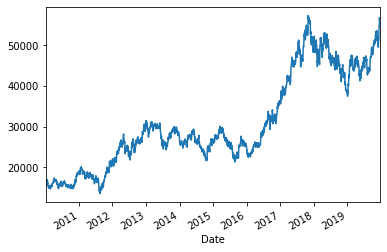

In [ ]:
code = get_code(code_df, '삼성전자')

df = pdr.get_data_yahoo(code)

df['Close'].plot()

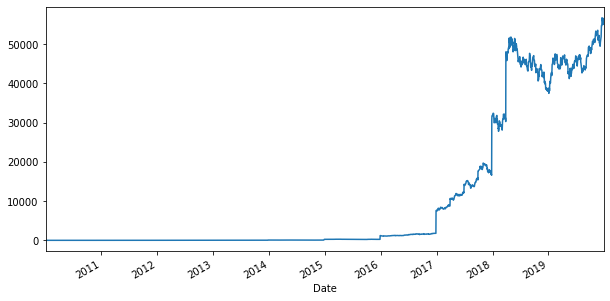

In [ ]:
# 수정주가를 반영
df = pdr.get_data_yahoo(code, adjust_price=True)

df['Close'].plot(figsize=(10, 5))

In [ ]:
df

,High,Low,Open,Close,Volume,Adj_Ratio
Date,,,,,,
2010-01-04,5.854249,5.789121,5.810831,5.854249,11950800.0,0.000362
2010-01-05,5.998978,5.897668,5.977268,5.948323,27925850.0,0.000362
2010-01-06,6.085815,5.977269,5.998978,6.085815,22948850.0,0.000362
2010-01-07,6.085815,5.883196,6.085815,5.883196,22107950.0,0.000362
2010-01-08,5.941086,5.832540,5.933850,5.941086,14777550.0,0.000362
...,...,...,...,...,...,...
2019-12-20,56500.000000,55600.000000,56100.000000,56000.000000,12095519.0,1.000000
2019-12-23,56400.000000,55100.000000,56100.000000,55500.000000,9839252.0,1.000000
2019-12-24,55700.000000,54800.000000,55600.000000,55000.000000,11868463.0,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2453 entries, 2010-01-04 to 2019-12-27
Data columns (total 6 columns):
High         2453 non-null float64
Low          2453 non-null float64
Open         2453 non-null float64
Close        2453 non-null float64
Volume       2453 non-null float64
Adj_Ratio    2453 non-null float64
dtypes: float64(6)
memory usage: 134.1 KB
